# TikZ-Feynman

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex, PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points
import pyfeyn2
print(pyfeyn2.__version__)

2.4.1.36


## Simple Case

We set the positions of all vertices here.

In [2]:
v1 = Vertex("v1").with_xy(-1, 0).with_shape("blob")
v2 = Vertex("v2").with_xy(1, 0).with_style("symbol : dot")

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(name="g").connect(v1, v2),
    Leg(name="g").with_target(v1).with_xy(-2, 1).with_incoming(),
    Leg(name="g").with_target(v1).with_xy(-2, -1).with_incoming().with_class("notred"),
    Leg(name="g").with_target(v2).with_xy(2, 1).with_outgoing().with_class("red"),
    Leg("myid1",name="g").with_target(v2).with_xy(2, -1).with_outgoing().with_style_property("bend-direction","right")
)

/tmp/ipykernel_10757/1904706615.py:1: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v1 = Vertex("v1").with_xy(-1, 0).with_shape("blob")
/tmp/ipykernel_10757/1904706615.py:2: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v2 = Vertex("v2").with_xy(1, 0).with_style("symbol : dot")
/tmp/ipykernel_10757/1904706615.py:4: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  fd = FeynmanDiagram().add(
/tmp/ipykernel_10757/1904706615.py:6: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  Propagator(name="g").connect(v1, v2),
/tmp/ipykernel_10757/1904706615.py:7: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  Leg(name="g").with_target(v1).with_xy(-2, 1).with_incoming(),
/tmp/ipykernel_10757/1904706615.py:8: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  Leg(name="g").with_target(v1).with_xy(-2, -1).with_incoming().with_class("notred"),
/tmp/ipykernel_10757/1904706615.py:9: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  Leg(name="g")

### Style

In [3]:
fd = fd.with_rule("""
* {
    bend-direction: left;
    color: green;
}
""")

In [4]:
print(fd)

FeynmanDiagram(id='FeynmanDiagram8', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Propagator9', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source='v1', target='v2')], vertices=[Vertex(id='v1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=-1.0, y=0.0, z=None, label=None, shape='blob'), Vertex(id='v2', style=cssutils.css.CSSStyleDeclaration(cssText='symbol: dot'), clazz=None, x=1.0, y=0.0, z=None, label=None, shape=None)], legs=[Leg(id='Leg10', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target='v1', x=-2.0, y=1.0, z=None, shape=None, sense='incoming', external=None), Leg(id='Leg11', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=

In [5]:
fd.add_rules("""
.red {
    color: red;
}
.notred {
    color: blue;
}
#myid1 {
    color: gray;
}
[pdgid="21"] {
    color: black;
}
#myid2 {
    color: gray;
}
diagram.propagator {
    color: green;
}
""")
fd.sheet.cssText

b'* {\n    bend-direction: left;\n    color: green\n    }\n.red {\n    color: red\n    }\n.notred {\n    color: blue\n    }\n#myid1 {\n    color: gray\n    }\n[pdgid="21"] {\n    color: black\n    }\n#myid2 {\n    color: gray\n    }\ndiagram.propagator {\n    color: green\n    }'

In [6]:
fd.to_xml()

'<?xml version="1.0" encoding="UTF-8"?>\n<diagram id="FeynmanDiagram8" style="" sheet="* {&#10;    bend-direction: left;&#10;    color: green&#10;    }&#10;.red {&#10;    color: red&#10;    }&#10;.notred {&#10;    color: blue&#10;    }&#10;#myid1 {&#10;    color: gray&#10;    }&#10;[pdgid=&quot;21&quot;] {&#10;    color: black&#10;    }&#10;#myid2 {&#10;    color: gray&#10;    }&#10;diagram.propagator {&#10;    color: green&#10;    }">\n  <propagator xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="Propagator9" pdgid="21" type="gluon" style="" xsi:type="Propagator">\n    <name>g</name>\n    <source>v1</source>\n    <target>v2</target>\n  </propagator>\n  <vertex xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="v1" style="" x="-1.0" y="0.0" shape="blob" xsi:type="Vertex"/>\n  <vertex xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="v2" style="symbol: dot" x="1.0" y="0.0" xsi:type="Vertex"/>\n  <leg xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="Leg1

In [7]:
tfd = TikzFeynmanRender(fd)
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\pgfsetblendmode{multiply}
\begin{feynman}
	\vertex (v1) [blob,scale=] at (-1.0,0.0) {};
	\vertex (v1clone) [] at (-1.0,0.0);
	\vertex (v2) [dot,scale=] at (1.0,0.0) {};
	\vertex (v2clone) [] at (1.0,0.0);
	\vertex (Leg10) [] at (-2.0,1.0);
	\vertex (Leg11) [] at (-2.0,-1.0);
	\vertex (Leg12) [] at (2.0,1.0);
	\vertex (myid1) [] at (2.0,-1.0);
\begin{scope}[transparency group]	\diagram*{
		(v1) -- [gluon,black,bend left] (v2),
	};
\end{scope}\begin{scope}[transparency group]	\diagram*{
		(Leg10) -- [gluon,black,bend left] (v1),
	};
\end{scope}\begin{scope}[transparency group]	\diagram*{
		(Leg11) -- [gluon,blue,bend left] (v1),
	};
\end{scope}\begin{scope}[transparency group]	\diagram*{
		(v2) -- [

In [8]:
tfd.render("test.pdf")

This is LuaHBTeX, Version 1.13.0 (TeX Live 2021 Gentoo Linux) 
 system commands enabled.
(/tmp/tmprcpt4h6m/test.tex
LaTeX2e <2020-10-01> patch level 4
 L3 programming layer <2021-02-18>
(/usr/share/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/share/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/generic/luatex85/luatex85.s

CalledProcessError: Command '['lualatex', '-shell-escape', '--interaction=nonstopmode', '/tmp/tmprcpt4h6m/test.tex']' returned non-zero exit status 1.

## Complicated Case

We only set the positions of the Legs here.

In [9]:
fd = FeynmanDiagram().with_rules(
    """ * {color: red;} 
        [type=fermion] {color: blue; line: gluon}
        #p1 {color: green;}
        :not([type=fermion]) { color : black; line: fermion}""")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2).with_class("blue")
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, -1)

l6.style.color = "orange"

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

/tmp/ipykernel_10757/1594115405.py:1: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  fd = FeynmanDiagram().with_rules(
/tmp/ipykernel_10757/1594115405.py:6: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v1 = Vertex("v1")
/tmp/ipykernel_10757/1594115405.py:7: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v2 = Vertex("v2")
/tmp/ipykernel_10757/1594115405.py:8: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v3 = Vertex("v3")
/tmp/ipykernel_10757/1594115405.py:9: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  v4 = Vertex("v4")
/tmp/ipykernel_10757/1594115405.py:10: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
/tmp/ipykernel_10757/1594115405.py:11: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
/tmp/ipykernel_10757/1594115405.py:12: DeprecatedWarning: __init__ is deprecated as of 2.2.6.
  p3 = Propagator("

Now calculate the positions of vertices.

In [10]:
ffd= feynman_adjust_points(fd)

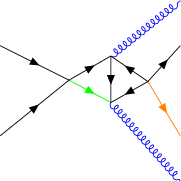

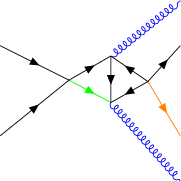

In [11]:
TikzFeynmanRender(ffd).render()

In [12]:
fd.get_sheets()[0].cssText

b'/*************************************************************************/\n/* Diagram */\n/*************************************************************************/\ndiagram {\n    direction: right;\n    layout: neato\n    }\n/*************************************************************************/\n/* Vertex */\n/*************************************************************************/\n[shape=dot] {\n    symbol: dot\n    }\n[shape=empty] {\n    symbol: empty\n    }\n[shape=blob] {\n    symbol: blob\n    }\n[shape=star] {\n    symbol: star\n    }\n[shape=square] {\n    symbol: square\n    }\n[shape=triangle] {\n    symbol: triangle\n    }\n[shape=diamond] {\n    symbol: diamond\n    }\n[shape=pentagon] {\n    symbol: pentagon\n    }\n[shape=hexagon] {\n    symbol: hexagon\n    }\n[shape=triagram] {\n    symbol: triagram\n    }\n[shape=tetragram] {\n    symbol: tetragram\n    }\n[shape=pentagram] {\n    symbol: pentagram\n    }\n[shape=cross] {\n    symbol: cross\n    }\n[shape

In [13]:
fd.get_sheets()[1].cssText

b'* {\n    color: red\n    }\n[type=fermion] {\n    color: blue;\n    line: gluon\n    }\n#p1 {\n    color: green\n    }\n:not([type=fermion]) {\n    color: black;\n    line: fermion\n    }'

In [14]:
fd.get_sheets()

[cssutils.css.CSSStyleSheet(href=None, media=None, title=None),
 cssutils.css.CSSStyleSheet(href=None, media=None, title=None)]